3stars: v1
Chosen n_components: 2
Mean:  1.7553297031843718
Weights: [0.517 0.483]
Means: [1.965 1.531]
Std devs: [0.196 0.162]


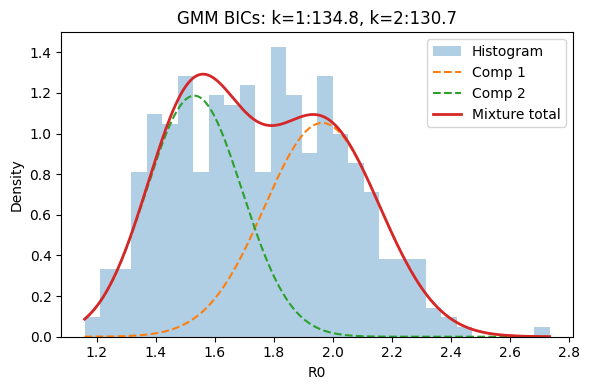

Chosen n_components: 2
Weights: [0.514 0.486]
Mean:  0.5481169450314244
Means: [0.731 0.354]
Std devs: [0.15  0.157]


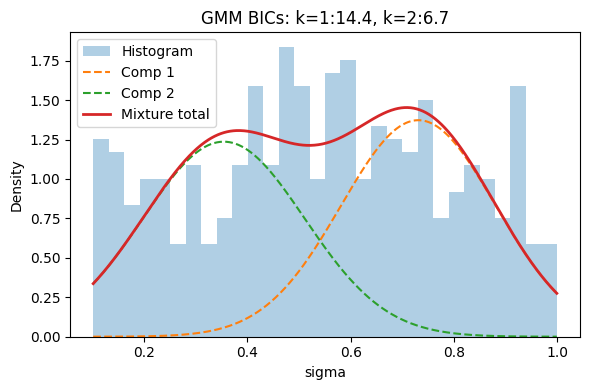

Chosen n_components: 3
Weights: [0.368 0.345 0.288]
Mean:  0.28427733875993133
Means: [0.423 0.135 0.285]
Std devs: [0.047 0.052 0.051]


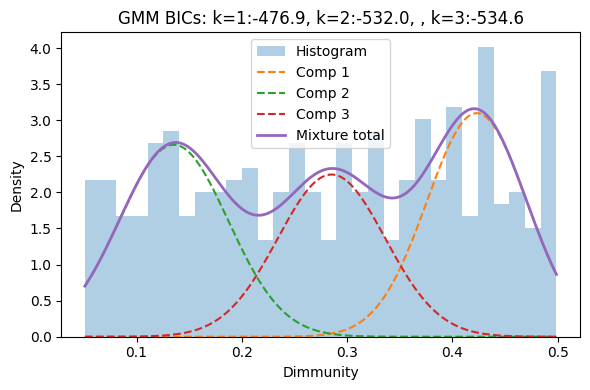

Chosen n_components: 2
Weights: [0.483 0.517]
Mean:  0.3405155176766042
Means: [0.217 0.456]
Std devs: [0.084 0.077]


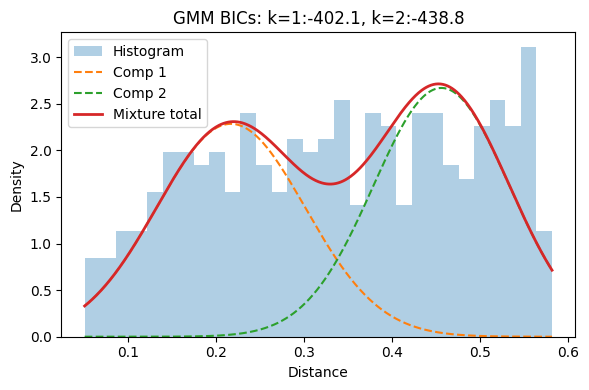

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v1.csv", delimiter=",")

print("3stars: v1")

x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Mean: ", np.mean(x))
print("Weights:", np.round(best.weights_, 3))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v1.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v1.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v1.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



3stars: v2
Chosen n_components: 2
Weights: [0.521 0.479]
Mean:  1.769404194667287
Means: [1.977 1.544]
Std devs: [0.247 0.17 ]


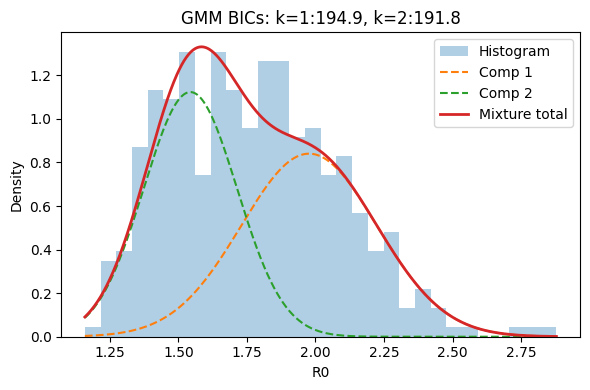

Chosen n_components: 2
Weights: [0.522 0.478]
Mean:  0.5535796631129021
Means: [0.736 0.354]
Std devs: [0.149 0.157]


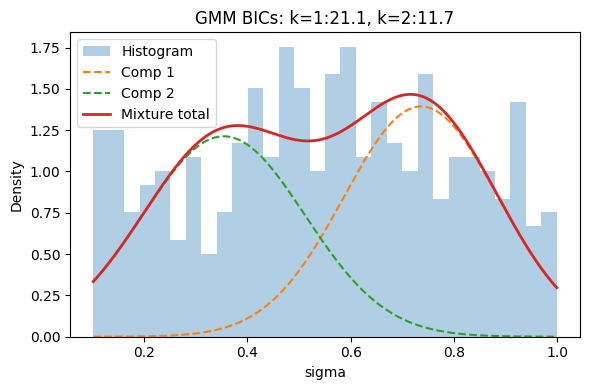

Chosen n_components: 2
Weights: [0.533 0.467]
Mean:  0.2919463558395427
Means: [0.396 0.174]
Std devs: [0.066 0.073]


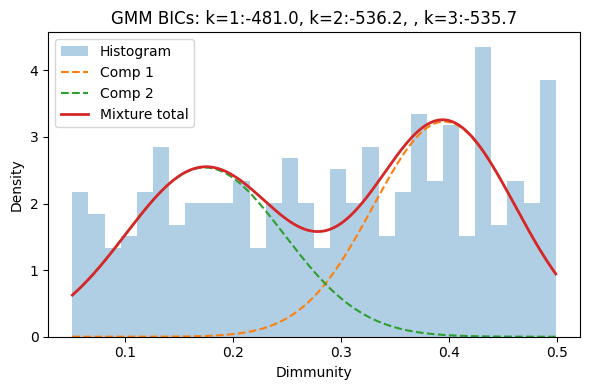

Chosen n_components: 2
Weights: [0.488 0.512]
Mean:  0.3068426894417637
Means: [0.187 0.421]
Std devs: [0.08  0.077]


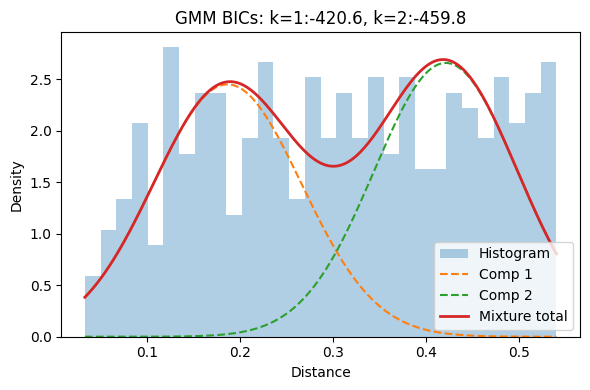

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v2.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v2")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v2.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v2.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v2.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



3stars: v3
Chosen n_components: 2
Weights: [0.5 0.5]
Mean:  1.7461197532367365
Means: [1.526 1.966]
Std devs: [0.17  0.203]


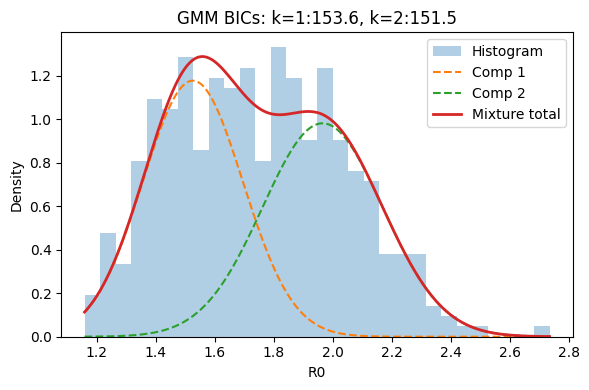

Chosen n_components: 2
Weights: [0.49 0.51]
Mean:  0.5449481600855655
Means: [0.352 0.73 ]
Std devs: [0.157 0.149]


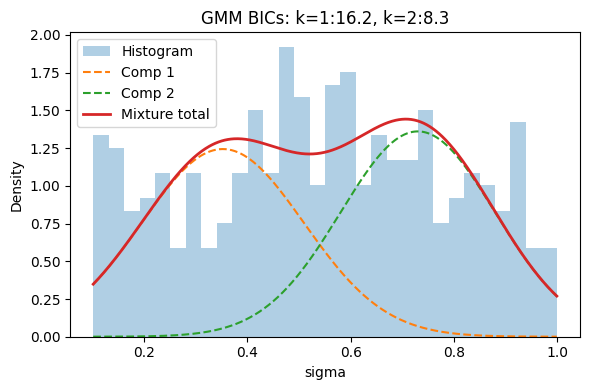

Chosen n_components: 3
Weights: [0.339 0.371 0.29 ]
Mean:  0.2860008416746942
Means: [0.135 0.424 0.285]
Std devs: [0.052 0.047 0.051]


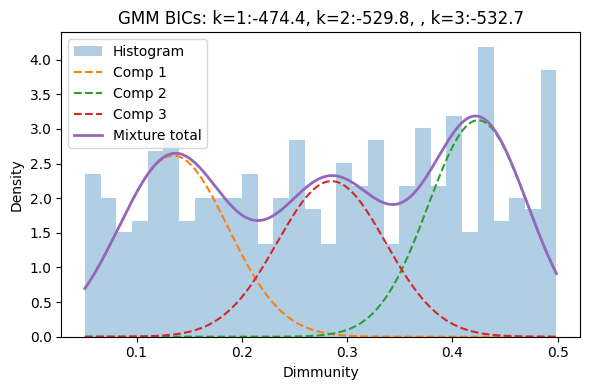

Chosen n_components: 2
Weights: [0.525 0.475]
Mean:  0.32428085684223346
Means: [0.435 0.203]
Std devs: [0.077 0.079]


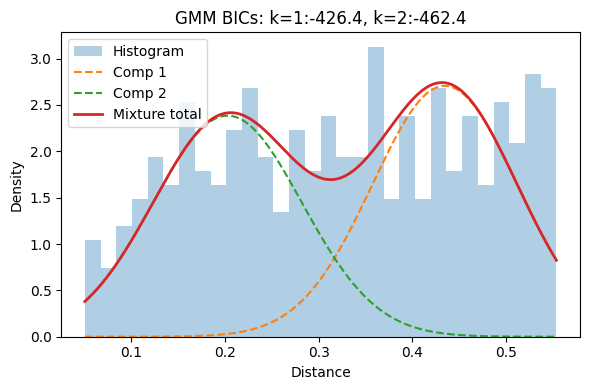

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v3.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v3")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v3.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



3stars: v4
Chosen n_components: 2
Weights: [0.511 0.489]
Mean:  1.7443941251256172
Means: [1.541 1.957]
Std devs: [0.158 0.169]


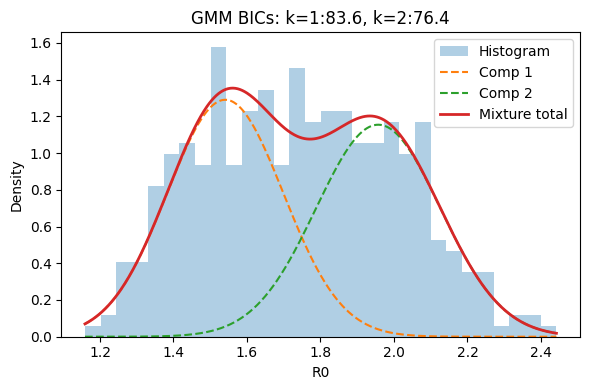

Chosen n_components: 2
Weights: [0.498 0.502]
Mean:  0.5381973226046013
Means: [0.349 0.726]
Std devs: [0.155 0.148]


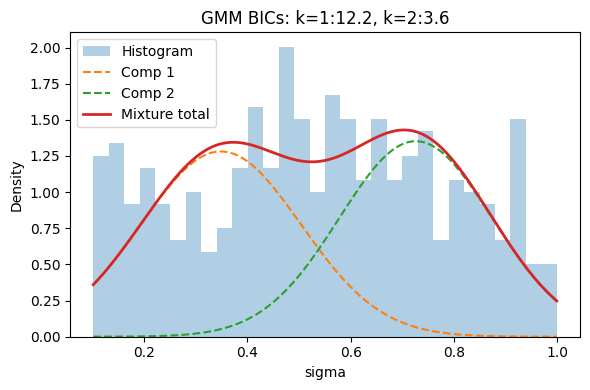

Chosen n_components: 3
Weights: [0.315 0.361 0.323]
Mean:  0.27830426244391476
Means: [0.122 0.422 0.271]
Std devs: [0.045 0.048 0.054]


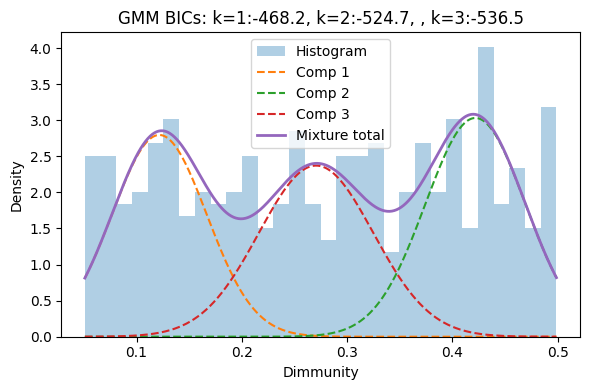

Chosen n_components: 2
Weights: [0.539 0.461]
Mean:  0.2723363201608182
Means: [0.356 0.174]
Std devs: [0.057 0.065]


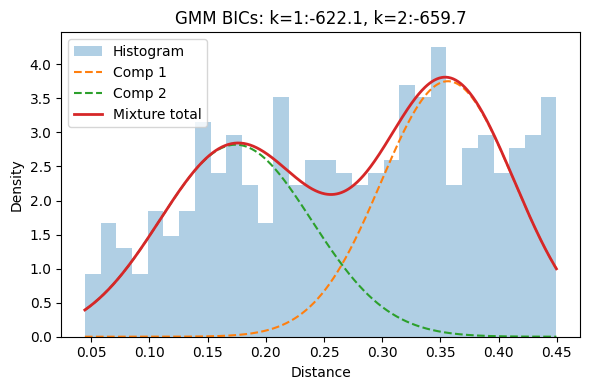

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v4.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v4")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v4.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v4.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v4.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



3stars: v5
Chosen n_components: 2
Weights: [0.505 0.495]
Mean:  1.7543527301365174
Means: [1.547 1.966]
Std devs: [0.158 0.174]


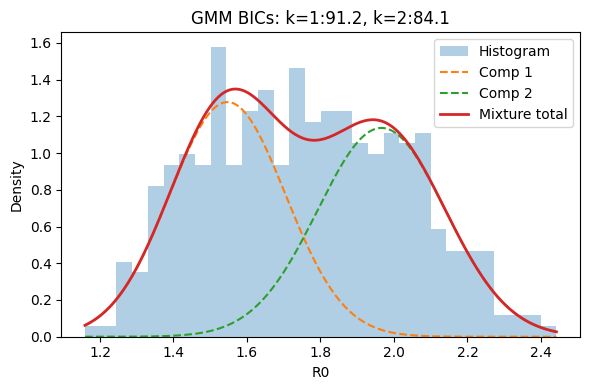

Chosen n_components: 2
Weights: [0.506 0.494]
Mean:  0.5386232540838051
Means: [0.725 0.348]
Std devs: [0.147 0.155]


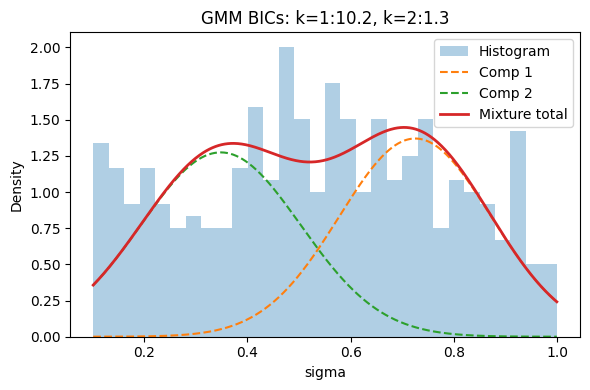

Chosen n_components: 3
Weights: [0.36  0.318 0.322]
Mean:  0.2793837518189507
Means: [0.423 0.273 0.125]
Std devs: [0.047 0.054 0.047]


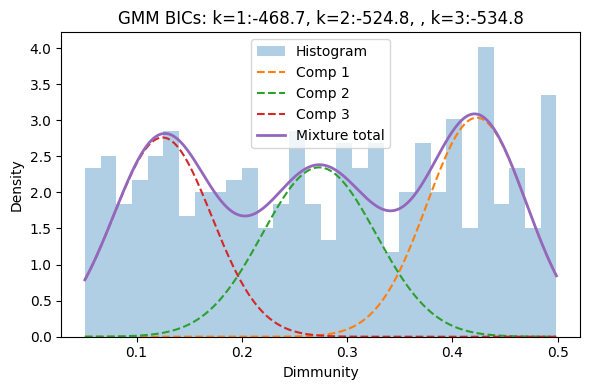

Chosen n_components: 2
Weights: [0.486 0.514]
Mean:  0.2689894867983202
Means: [0.178 0.355]
Std devs: [0.064 0.055]


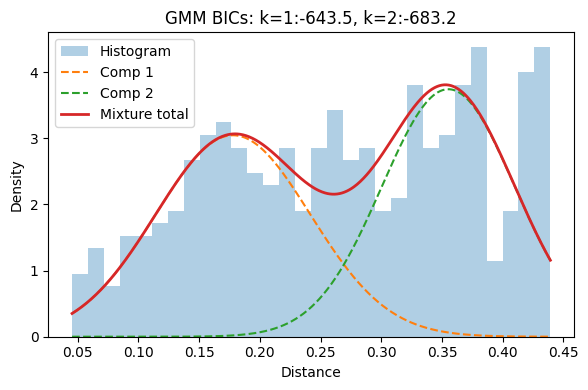

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v5.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v5")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v5.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v5.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v5.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



3stars: v6
Chosen n_components: 2
Weights: [0.501 0.499]
Mean:  1.7478735480567549
Means: [1.527 1.969]
Std devs: [0.163 0.195]


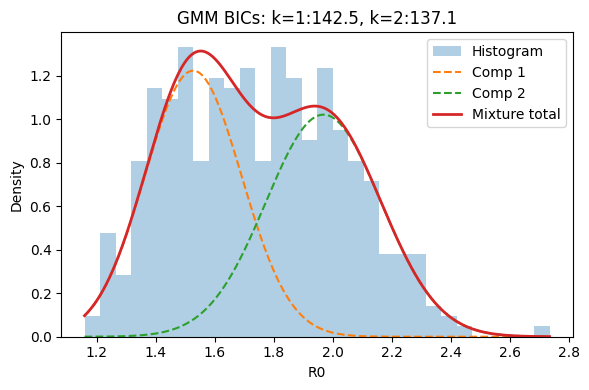

Chosen n_components: 2
Weights: [0.519 0.481]
Mean:  0.5439644184651766
Means: [0.727 0.346]
Std devs: [0.152 0.155]


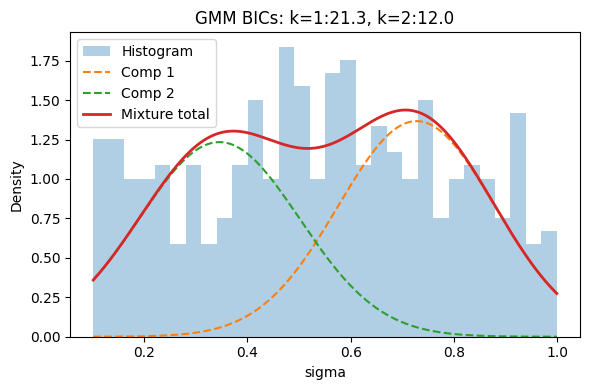

Chosen n_components: 3
Weights: [0.303 0.396 0.301]
Mean:  0.2856549563455612
Means: [0.27  0.418 0.127]
Std devs: [0.054 0.05  0.047]


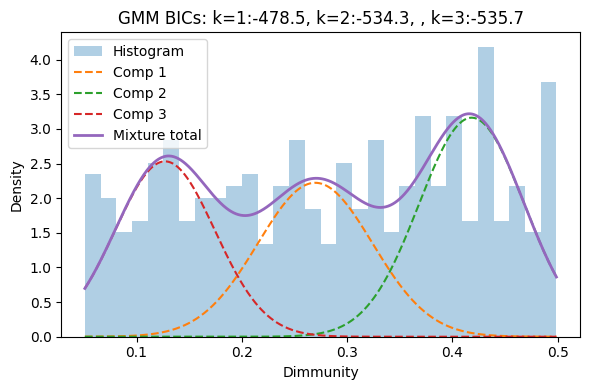

Chosen n_components: 2
Weights: [0.504 0.496]
Mean:  0.32306434321437605
Means: [0.443 0.201]
Std devs: [0.074 0.087]


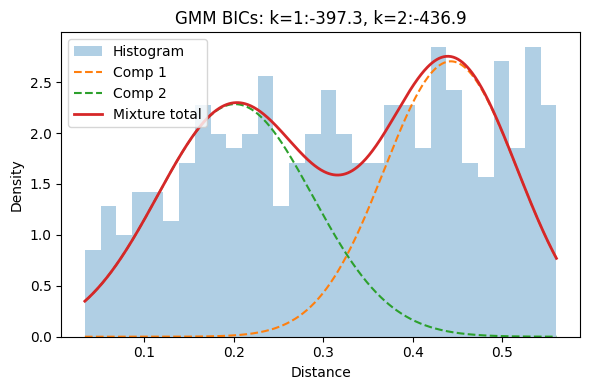

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v6.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v6")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v6.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v6.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v6.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

